In [3]:
import numpy as np

from data_utils import normalize_data, \
                       flatten_data, \
                       add_row_padding, \
                       split_fluxes, \
                       fuse_amplitude_and_phase, \
                       save_numpy_array, \
                       save_scaler

from plot_utils import plot_fluxes, plot_amp_phase_prediction

# 0. Objective

With this notebook we will process and save the flux, amplitude and phase data, dividing them into train, validation and test datasets.
The dataset sizes are the following:
- Train: 70000
- Validation: 10000
- Test: 10000

# 1. Flux Data

In [2]:
from constants import ORIGINAL_FLUXES_FILE

In [3]:
TRAIN_SIZE = 80000
VALIDATION_SIZE = 10000
TEST_SIZE = 10000

## 1.1 Flux Data for Fully Connected Architectures
For the FC Architectures we need to:
 - Normalize
 - Flatten

In [4]:
# Load flux data
fluxes_array = np.load(ORIGINAL_FLUXES_FILE)

Check the shape of the data, there should be 90000 data points

Process_data

In [5]:
fluxes_array.shape

(100000, 55, 24)

In [6]:
# Normalize data
fc_normalized_fluxes_array, fc_flux_scaler = normalize_data(fluxes_array)

In [7]:
# Flatten data
fc_flattened_normalized_fluxes_array = flatten_data(fc_normalized_fluxes_array)

In [8]:
# Split data
train_fc_fluxes, val_fc_fluxes, test_fc_fluxes = split_fluxes(fc_flattened_normalized_fluxes_array,
                                                              TRAIN_SIZE,
                                                              VALIDATION_SIZE,
                                                              TEST_SIZE)

In [9]:
train_fc_fluxes.shape

(80000, 1320)

In [10]:
val_fc_fluxes.shape

(10000, 1320)

In [11]:
test_fc_fluxes.shape

(10000, 1320)

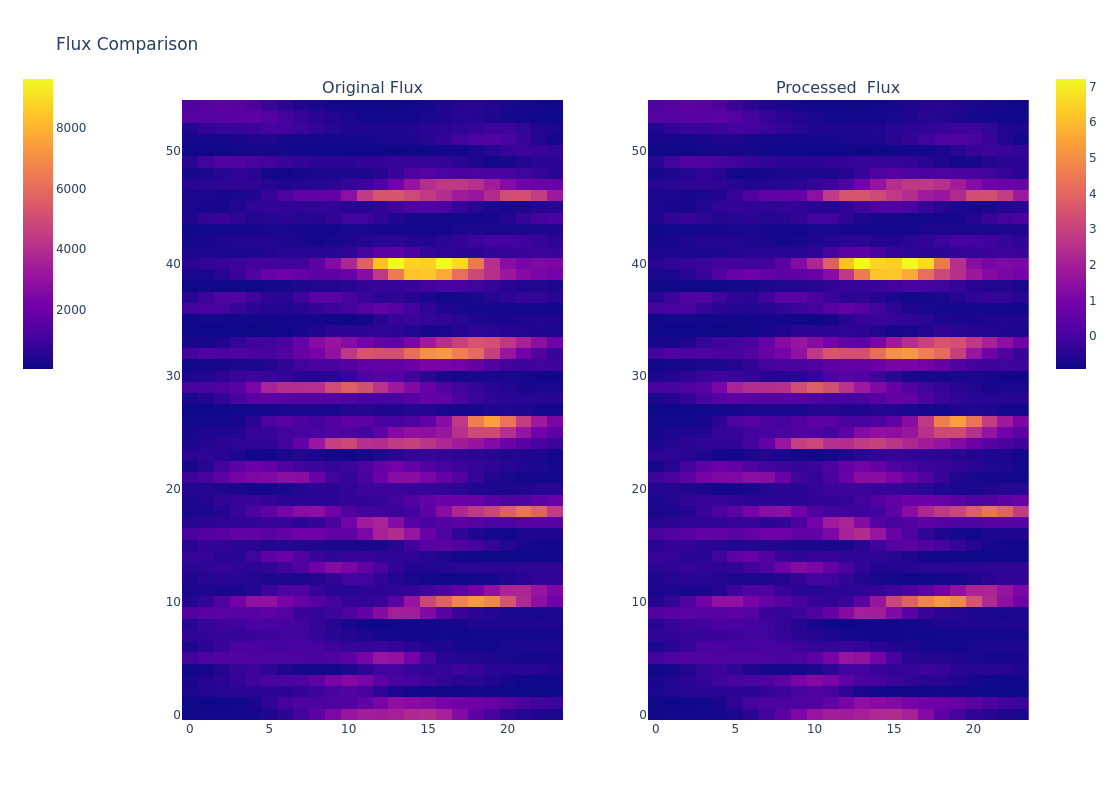

In [15]:
plot_fluxes(fluxes_array[90000], test_fc_fluxes[0])

Save data and scalers

In [16]:
# Load data paths
from constants import TRAIN_FC_FLUXES_PATH, \
                      VALIDATION_FC_FLUXES_PATH, \
                      TEST_FC_FLUXES_PATH, \
                      FC_FLUX_SCALER_PATH, \
                      TRAIN_FILE_SUFFIXES, \
                      NUMPY_SUFFIX

# Save train fluxes
start = 0
end = 10000
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_FC_FLUXES_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(train_fc_fluxes[start:end], filename, single_precision=True)
    start += 10000
    end += 10000

# Save validation fluxes
save_numpy_array(val_fc_fluxes, VALIDATION_FC_FLUXES_PATH, single_precision=True)
# Save test fluxes
save_numpy_array(test_fc_fluxes, TEST_FC_FLUXES_PATH, single_precision=True)
# Save fully connected flux scaler
save_scaler(fc_flux_scaler, FC_FLUX_SCALER_PATH)

## 1.2 Flux data for CNN Architectures

In [ ]:
from constants import ORIGINAL_FLUXES_FILE

For the CNN Architectures we need to:
- Normalize

In [ ]:
# Load flux data
fluxes_array = np.load(ORIGINAL_FLUXES_FILE)

Process data

In [ ]:
# Normalize data
conv_normalized_fluxes_array, conv_flux_scaler = normalize_data(fluxes_array)

In [ ]:
# Split data
train_conv_fluxes, val_conv_fluxes, test_conv_fluxes = split_fluxes(conv_normalized_fluxes_array,
                                                                    TRAIN_SIZE,
                                                                    VALIDATION_SIZE,
                                                                    TEST_SIZE)

In [ ]:
train_conv_fluxes.shape

In [ ]:
val_conv_fluxes.shape

In [ ]:
test_conv_fluxes.shape

Save data and scalers

In [ ]:
# Load data paths
from constants import TRAIN_CNN_FLUXES_PATH, \
                      VALIDATION_CNN_FLUXES_PATH, \
                      TEST_CNN_FLUXES_PATH, \
                      CNN_FLUX_SCALER_PATH, \
                      TRAIN_FILE_SUFFIXES, \
                      NUMPY_SUFFIX

# Save train fluxes
start = 0
end = 10000
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_CNN_FLUXES_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(train_conv_fluxes[start:end], filename)
    start += 10000
    end += 10000

# Save validation fluxes
save_numpy_array(val_conv_fluxes, VALIDATION_CNN_FLUXES_PATH)

# Save test fluxes
save_numpy_array(test_conv_fluxes, TEST_CNN_FLUXES_PATH)

# Save fully connected flux scaler
save_scaler(conv_flux_scaler, CNN_FLUX_SCALER_PATH)

## 1.3 Flux data for Autoencoder Architecture

For the Autoencoder Architecture we need to:
- Add padding
- Normalize

In [ ]:
# Load flux data
fluxes_array = np.load(ORIGINAL_FLUXES_FILE)

Process data

In [ ]:
# Add padding to data
padded_fluxes = add_row_padding(fluxes_array, top_rows=1, bottom_rows=0)

In [ ]:
# Normalize data
normalized_padded_fluxes_array, autoencoder_flux_scaler = normalize_data(padded_fluxes)

In [ ]:
# Split data
train_autoencoder_fluxes, val_autoencoder_fluxes, test_autoencoder_fluxes = split_fluxes(normalized_padded_fluxes_array,
                                                                                         TRAIN_SIZE,
                                                                                         VALIDATION_SIZE,
                                                                                         TEST_SIZE)

In [ ]:
train_autoencoder_fluxes.shape

In [ ]:
val_autoencoder_fluxes.shape

In [ ]:
test_autoencoder_fluxes.shape

Save data and scalers

In [ ]:
# Load data paths
from constants import TRAIN_AUTOENCODER_FLUXES_PATH, \
                      VALIDATION_AUTOENCODER_FLUXES_PATH, \
                      TEST_AUTOENCODER_FLUXES_PATH, \
                      AUTOENCODER_FLUX_SCALER_PATH, \
                      TRAIN_FILE_SUFFIXES, \
                      NUMPY_SUFFIX

# Save train fluxes
start = 0
end = 10000
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_AUTOENCODER_FLUXES_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(train_autoencoder_fluxes[start:end], filename)
    start += 10000
    end += 10000

# Save train fluxes
save_numpy_array(train_autoencoder_fluxes, TRAIN_AUTOENCODER_FLUXES_PATH)
# Save validation fluxes
save_numpy_array(val_autoencoder_fluxes, VALIDATION_AUTOENCODER_FLUXES_PATH)
# Save test fluxes
save_numpy_array(test_autoencoder_fluxes, TEST_AUTOENCODER_FLUXES_PATH)
# Save fully connected flux scaler
save_scaler(autoencoder_flux_scaler, AUTOENCODER_FLUX_SCALER_PATH)

# 2. Amplitude and Phase Data

In [3]:
import numpy as np

from data_utils import normalize_data, \
                       flatten_data, \
                       add_row_padding, \
                       split_fluxes, \
                       fuse_amplitude_and_phase, \
                       save_numpy_array, \
                       save_scaler

from plot_utils import plot_fluxes, plot_amp_phase_prediction

## 2.1 Amplitude and Phase for Fully Connected Architecture

For the FC architectures we need to:
- Normalize
- Stack amplitude and phase

In [1]:
from constants import ORIGINAL_SLM_FOLDER, \
                      ORIGINAL_AMPLITUDE_FILENAME, \
                      ORIGINAL_PHASE_FILENAME, \
                      TRAIN_FILE_SUFFIXES, \
                      VALIDATION_FILE_SUFFIX, \
                      TEST_FILE_SUFFIX, \
                      NUMPY_SUFFIX

from plot_utils import plot_amp_phase_prediction

In [4]:
# Load data
amplitudes = []
phases = []

for file_number in TRAIN_FILE_SUFFIXES + [VALIDATION_FILE_SUFFIX] + [TEST_FILE_SUFFIX]:
    amp_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_AMPLITUDE_FILENAME}"
    phase_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_PHASE_FILENAME}"
    amplitudes.append(np.float32(np.load(amp_filename)))
    phases.append(np.float32(np.load(phase_filename)))

amplitudes = np.concatenate(amplitudes, axis=0)
phases = np.concatenate(phases, axis=0)


Now process the data

In [5]:
# Normalize data
normalized_amplitudes, fc_amplitude_scaler = normalize_data(amplitudes)
normalized_phases, fc_phase_scaler = normalize_data(phases)

In [6]:
normalized_amplitudes.shape
normalized_phases.shape

(100000, 96, 96)

In [7]:
# Stack amplitude and phase
amp_phase_array = fuse_amplitude_and_phase(normalized_amplitudes, normalized_phases)
amp_phase_array.shape

(100000, 2, 96, 96)

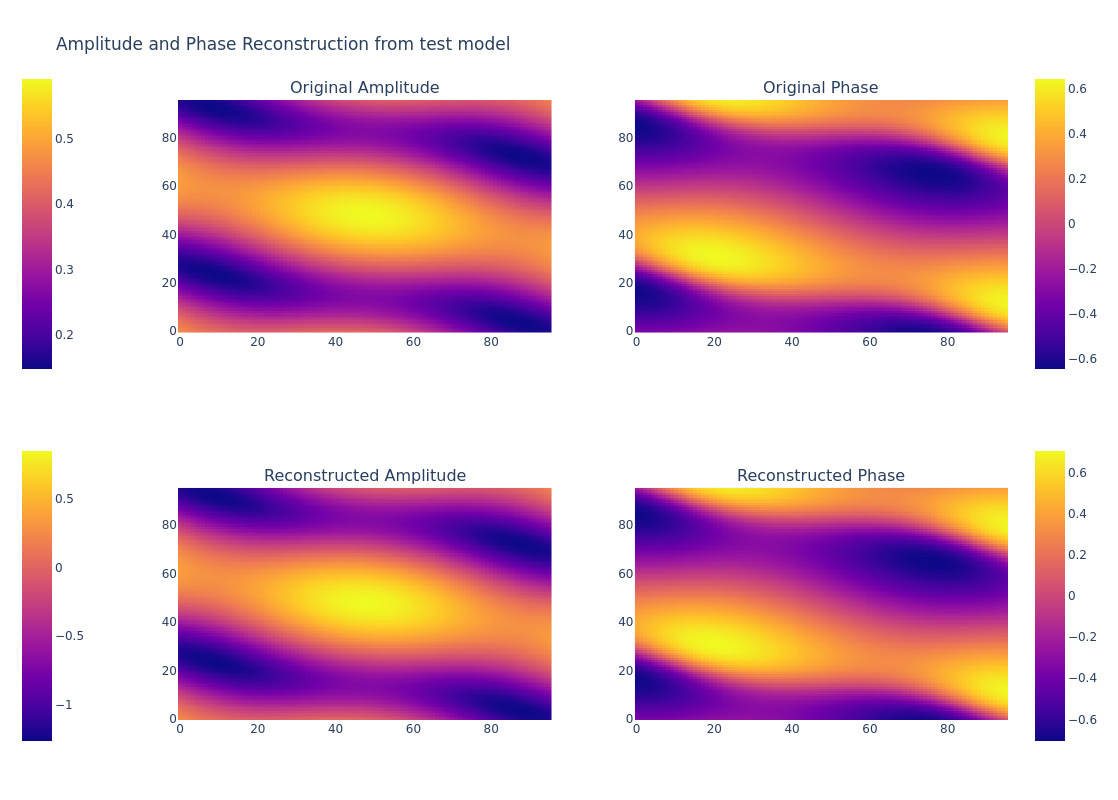

In [10]:
plot_amp_phase_prediction(amp_phase_array[80000][0], amp_phase_array[80000][1], amplitudes[80000], phases[80000], 'test')

Save data

In [11]:
from constants import TRAIN_FC_AMP_PHASE_PATH, \
                      VALIDATION_FC_AMP_PHASE_PATH, \
                      TEST_FC_AMP_PHASE_PATH, \
                      FC_AMP_SCALER_PATH, \
                      FC_PHASE_SCALER_PATH

In [12]:
start = 0
end = 10000
# Save train data
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_FC_AMP_PHASE_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(amp_phase_array[start:end], filename, single_precision=True)
    start += 10000
    end += 10000

# Save validation data
save_numpy_array(amp_phase_array[start:end], VALIDATION_FC_AMP_PHASE_PATH, single_precision=True)
start += 10000
end += 10000

# Save test data
save_numpy_array(amp_phase_array[start:end], TEST_FC_AMP_PHASE_PATH, single_precision=True)

# Save scalers
save_scaler(fc_amplitude_scaler, FC_AMP_SCALER_PATH)
save_scaler(fc_phase_scaler, FC_PHASE_SCALER_PATH)

## 2.2 Amplitude and Phase for Convolutional Architecture

For CNN Architecture we need to:
- Normalize
- Stack amplitude and phase

In [ ]:
from constants import ORIGINAL_SLM_FOLDER, \
                      ORIGINAL_AMPLITUDE_FILENAME, \
                      ORIGINAL_PHASE_FILENAME, \
                      TRAIN_FILE_SUFFIXES, \
                      VALIDATION_FILE_SUFFIX, \
                      TEST_FILE_SUFFIX, \
                      NUMPY_SUFFIX

from plot_utils import plot_amp_phase_prediction

In [ ]:
# Load data
amplitudes = []
phases = []

for file_number in TRAIN_FILE_SUFFIXES + [VALIDATION_FILE_SUFFIX] + [TEST_FILE_SUFFIX]:
    amp_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_AMPLITUDE_FILENAME}"
    phase_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_PHASE_FILENAME}"
    amplitudes.append(np.float32(np.load(amp_filename)))
    phases.append(np.float32(np.load(phase_filename)))

amplitudes = np.concatenate(amplitudes, axis=0)
phases = np.concatenate(phases, axis=0)

Now process data

In [ ]:
# Normalize data
normalized_amplitudes, cnn_amplitude_scaler = normalize_data(amplitudes)
normalized_phases, cnn_phase_scaler = normalize_data(phases)

In [ ]:
plot_amp_phase_prediction(normalized_amplitudes[0], normalized_phases[0], amplitudes[0], phases[0], "A")

In [ ]:
normalized_amplitudes.shape
normalized_phases.shape

In [ ]:
# Stack amplitude and phase
amp_phase_array = fuse_amplitude_and_phase(normalized_amplitudes, normalized_phases, axis=3)
amp_phase_array.shape

In [ ]:
plot_amp_phase_prediction(a[0], a[1], amplitudes[0], phases[0], "A")

Save data

In [ ]:
from constants import TRAIN_CNN_AMP_PHASE_PATH, \
                      VALIDATION_CNN_AMP_PHASE_PATH, \
                      TEST_CNN_AMP_PHASE_PATH, \
                      CNN_AMP_SCALER_PATH, \
                      CNN_PHASE_SCALER_PATH

In [ ]:
start = 0
end = 10000
# Save train data
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_CNN_AMP_PHASE_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(amp_phase_array[start:end], filename)
    start += 10000
    end += 10000

# Save validation data
save_numpy_array(amp_phase_array[start:end], VALIDATION_CNN_AMP_PHASE_PATH)
start += 10000
end += 10000

# Save test data
save_numpy_array(amp_phase_array[start:end], TEST_CNN_AMP_PHASE_PATH)

# Save scalers
save_scaler(cnn_amplitude_scaler, CNN_AMP_SCALER_PATH)
save_scaler(cnn_phase_scaler, CNN_PHASE_SCALER_PATH)

## 2.3 Amplitude and Phase for Autoencoder + Convolutional Architecture

For the Autoencoder + Convolutional Architecture we need to:
- Add padding (8 top and 8 bottom rows)
- Normalize
- Stack amplitude and phase
- Swap axes

In [ ]:
from constants import ORIGINAL_SLM_FOLDER, \
                      ORIGINAL_AMPLITUDE_FILENAME, \
                      ORIGINAL_PHASE_FILENAME, \
                      TRAIN_FILE_SUFFIXES, \
                      VAL_AMP_PHASE_FILE_SUFFIX, \
                      TEST_AMP_PHASE_FILE_SUFFIX, \
                      NUMPY_SUFFIX

In [ ]:
# Load data
amplitudes = []
phases = []

for file_number in TRAIN_FILE_SUFFIXES + [VAL_AMP_PHASE_FILE_SUFFIX] + [TEST_AMP_PHASE_FILE_SUFFIX]:
    amp_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_AMPLITUDE_FILENAME}"
    amplitudes.append(np.float32(np.load(amp_filename)))

amplitudes = np.concatenate(amplitudes, axis=0)

Process data

First amplitudes

In [ ]:
# Add padding
amplitudes = add_row_padding(amplitudes, top_rows=8, bottom_rows=8)

In [ ]:
# Normalize data
normalized_amplitudes, autoencoder_amplitude_scaler = normalize_data(amplitudes)

In [ ]:
from constants import AUTOENCODER_AMP_SCALER_PATH
save_numpy_array(normalized_amplitudes, "temp_amp.npy")
save_scaler(autoencoder_amplitude_scaler, AUTOENCODER_AMP_SCALER_PATH)

Now phases

In [ ]:
# Load data
phases = []

for file_number in TRAIN_FILE_SUFFIXES + [VAL_AMP_PHASE_FILE_SUFFIX] + [TEST_AMP_PHASE_FILE_SUFFIX]:
    phase_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_PHASE_FILENAME}"
    phases.append(np.float32(np.load(phase_filename)))
    
phases = np.concatenate(phases, axis=0)

In [ ]:
phases = add_row_padding(phases, top_rows=8, bottom_rows=8)

In [ ]:
normalized_phases, autoencoder_phase_scaler = normalize_data(phases)

In [ ]:
from constants import AUTOENCODER_PHASE_SCALER_PATH
save_numpy_array(normalized_phases, "temp_phase.npy")
save_scaler(autoencoder_phase_scaler, AUTOENCODER_PHASE_SCALER_PATH)

In [ ]:
normalized_phases.shape

Second part: Stack amplitude and phase

In [ ]:
# Stack amplitude and phase
amplitudes = np.load("temp_amp.npy")[0:70000]
phases = np.load("temp_phase.npy")[0:70000]

amp_phase_array = fuse_amplitude_and_phase(amplitudes, phases)
amp_phase_array.shape

amp_phase_array = np.swapaxes(amp_phase_array, 1, 3)
amp_phase_array = np.swapaxes(amp_phase_array, 1, 2)

In [ ]:
amp_phase_array.shape

Save data

In [ ]:
from constants import TRAIN_AUTOENCODER_AMP_PHASE_PATH, \
                      VALIDATION_AUTOENCODER_AMP_PHASE_PATH, \
                      TEST_AUTOENCODER_AMP_PHASE_PATH

In [ ]:
start = 0
end = 10000
# Save train data
for train_file in TRAIN_FILE_SUFFIXES:
    filename = f"{TRAIN_AUTOENCODER_AMP_PHASE_PATH}{train_file}{NUMPY_SUFFIX}"
    save_numpy_array(amp_phase_array[start:end], filename)
    start += 10000
    end += 10000

In [ ]:
# Stack amplitude and phase
amplitudes = np.load("temp_amp.npy")[70000:]
phases = np.load("temp_phase.npy")[70000:]

amp_phase_array = fuse_amplitude_and_phase(amplitudes, phases)
print(amp_phase_array.shape)

amp_phase_array = np.swapaxes(amp_phase_array, 1, 3)
amp_phase_array = np.swapaxes(amp_phase_array, 1, 2)

In [ ]:
print(amp_phase_array.shape)

In [ ]:
# Save validation data
save_numpy_array(amp_phase_array[0:10000], VALIDATION_AUTOENCODER_AMP_PHASE_PATH)
# Save test data
save_numpy_array(amp_phase_array[10000:20000], TEST_AUTOENCODER_AMP_PHASE_PATH)